In [1]:
# 데이터 분석에 필요한 라이브러리 추가
import numpy as np
import pandas as pd

# tensorflow 라이브러리 추가
import tensorflow as tf

# visualization 라이브러리 추가
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import train and test CSV file 읽어오기
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

# 읽어온 데이터의 어떤 값들이 들어있는지 보기
print(train.columns)
print(test.columns)

# 샘플로 찍어보자 
train.sample(5)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,240929,12.6500,NaN,S


Percentage of females who survived: 74.2038216561
Percentage of males who survived: 18.8908145581


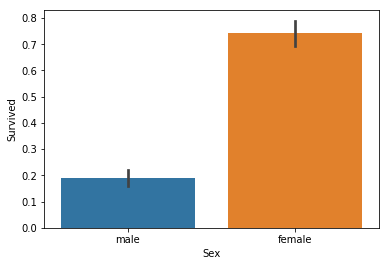

In [3]:
# 성별이 생존의 미치는 영향에 대해서 확인
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

# 성별은 있는 그대로여도 의미 있는 데이터 일듯하여 가공 없이 사용하기로 결정

Percentage of Pclass = 1 who survived: 62.962962963
Percentage of Pclass = 2 who survived: 47.2826086957
Percentage of Pclass = 3 who survived: 24.2362525458


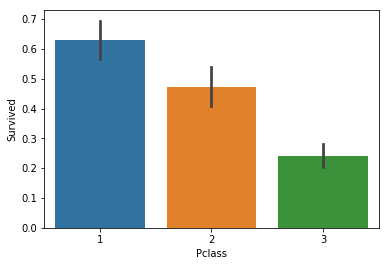

In [4]:
# Pclass 생존의 미치는 영향에 대해서 확인
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

# Pclass 역시 있는 그대로여도 의미 있는 데이터 일듯하여 가공 없이 사용하기로 결정

In [5]:
# 이름은 생존 여부에 전혀 관계가 없을 것 같다 (개인적인 생각)
# 따라서 Drop 해 본다
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

train.sample(5)

# 케글의 다른 커널 들에서는 이름의 작위를 분석해서 나이 부분을 채워준 커널이 많이 있다
# 나중에 검토해서 추가 해 보자

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
226,227,1,2,male,19.00,0,0,SW/PP 751,10.5000,NaN,S
640,641,0,3,male,20.00,0,0,350050,7.8542,NaN,S
345,346,1,2,female,24.00,0,0,248733,13.0000,F33,S
90,91,0,3,male,29.00,0,0,343276,8.0500,NaN,S
305,306,1,1,male,0.92,1,2,113781,151.5500,C22 C26,S


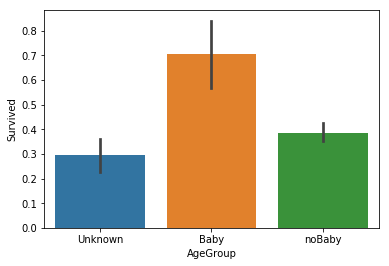

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
251,252,0,3,female,29.0,1,1,347054,10.4625,G6,S,noBaby
838,839,1,3,male,32.0,0,0,1601,56.4958,NaN,S,noBaby
431,432,1,3,female,-0.5,1,0,376564,16.1000,NaN,S,Unknown
254,255,0,3,female,41.0,0,2,370129,20.2125,NaN,S,noBaby
218,219,1,1,female,32.0,0,0,11813,76.2917,D15,C,noBaby


In [6]:
# 이름이 생존의 미치는 영향에 대해서 확인
# 이름엔 데이터 값이 없는 행이 존재 한다.
# 채워줘 본다
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

# 나이는 있는 그대로는 의미가 없어, 그룹으로 묶어 본다.
bins = [-1, 0, 5, np.inf]
labels = ['Unknown', 'Baby', 'noBaby']

train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

#see a sample of the dataset to get an idea of the variables
train.sample(5)

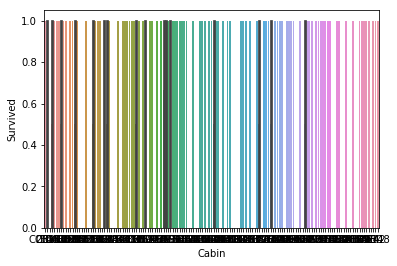

In [7]:
#draw a bar plot of survival by Cabin
sns.barplot(x="Cabin", y="Survived", data=train)

# 이대로는 의미 없는 데이터 일듯 가공이 필요해 보인다.

Percentage of CabinBool = 1 who survived: 66.6666666667
Percentage of CabinBool = 0 who survived: 29.9854439592


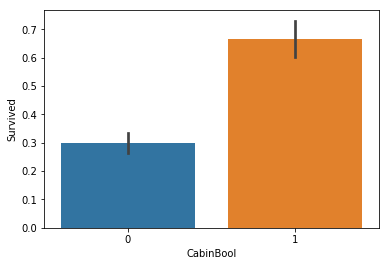

In [8]:
# 커널 참조해서 Cabin 값 NULL 여부로 분류해서 표시해 본다

train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

# 사용해도 좋을 것 같아 보인다. 일단 사용해본다

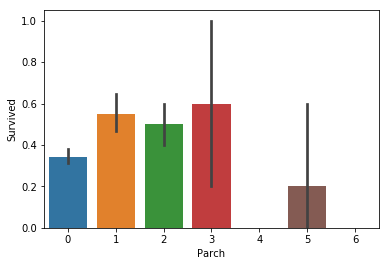

In [9]:
# Parch이 생존의 미치는 영향에 대해서 확인
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

# 일단 그대로 사용해 보고 향후 3 이상과 이하로 나눠서 그룹핑 해 보려한다

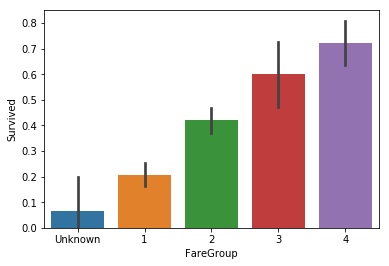

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,FareGroup
91,92,0,3,male,20.0,0,0,347466,7.8542,NaN,S,noBaby,0,1
870,871,0,3,male,26.0,0,0,349248,7.8958,NaN,S,noBaby,0,1
524,525,0,3,male,-0.5,0,0,2700,7.2292,NaN,C,Unknown,0,1
789,790,0,1,male,46.0,0,0,PC 17593,79.2000,B82 B84,C,noBaby,1,4
571,572,1,1,female,53.0,2,0,11769,51.4792,C101,S,noBaby,1,3


In [10]:
# 운임은 어느 정도 부유 척도에 영향이 있을듯한데, 그대로 쓰기는 힘들어 
# 그룹핑을 해본다

#sort the ages into logical categories
train["Fare"] = train["Fare"].fillna(-0.5)
test["Fare"] = test["Fare"].fillna(-0.5)

bins = [-1, 0, 10, 50, 70, np.inf]
labels = ['Unknown', '1', '2', '3', '4']

train['FareGroup'] = pd.cut(train["Fare"], bins, labels = labels)
test['FareGroup'] = pd.cut(test["Fare"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="FareGroup", y="Survived", data=train)
plt.show()


# 제대로 됬는지 샘플을 찍어보자
train.sample(5)

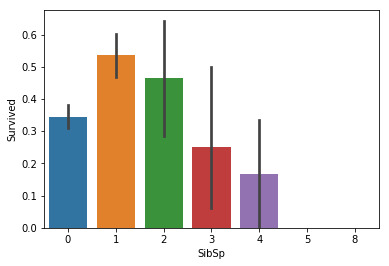

In [11]:
# Parch이 생존의 미치는 영향에 대해서 확인
sns.barplot(x="SibSp", y="Survived", data=train)
plt.show()

# 일단 그대로 사용해 보고 향후 3 이상과 이하로 나눠서 그룹핑 해 보려한다

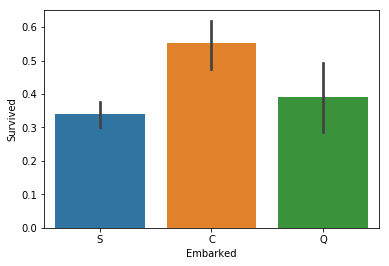

In [12]:
# 승선지에 따른 생존 여부 표시
train["Embarked"] = train["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].fillna("S")

sns.barplot(x="Embarked", y="Survived", data=train)
plt.show()

# 유의미 한지는 조금 더 고민해 보자
# 일반적으로는 승선지가 생존 여부에는 관계가 없을 것 같다

In [13]:
# 변경해 본 트레이닝 셋을 저장해 보자 
train.to_csv('remake_blackrains.csv', index=False)

In [14]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeGroup         0
CabinBool        0
FareGroup        0
dtype: int64


In [15]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
AgeGroup         0
CabinBool        0
FareGroup        0
dtype: int64


In [16]:
#create a combined group of both datasets
combine = [train, test]

sex_mapping = {"male": 1, "female": 2}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    dataset['Sex'] = dataset['Sex'].fillna(0)

# 제대로 됬는지 샘플을 찍어보자
train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,FareGroup
112,113,0,3,1,22.0,0,0,324669,8.050,NaN,S,noBaby,0,1
545,546,0,1,1,64.0,0,0,693,26.000,NaN,S,noBaby,0,2
577,578,1,1,2,39.0,1,0,13507,55.900,E44,S,noBaby,1,3
292,293,0,2,1,36.0,0,0,SC/Paris 2163,12.875,D,C,noBaby,1,2
27,28,0,1,1,19.0,3,2,19950,263.000,C23 C25 C27,S,noBaby,1,4


In [17]:
# 나이는 새로운 그룹으로 대체한다 따라서 기존 나이 항목은 드롭한다
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,FareGroup
557,558,0,1,1,0,0,PC 17757,227.5250,NaN,C,Unknown,0,4
156,157,1,3,2,0,0,35851,7.7333,NaN,Q,noBaby,0,1
86,87,0,3,1,1,3,W./C. 6608,34.3750,NaN,S,noBaby,0,2
176,177,0,3,1,3,1,4133,25.4667,NaN,S,Unknown,0,2
577,578,1,1,2,1,0,13507,55.9000,E44,S,noBaby,1,3


In [18]:
# 티켓는 특정 데이터를 만들어 낼 것이 없어 보여 드롭한다
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinBool,FareGroup
121,122,0,3,1,0,0,8.050,NaN,S,Unknown,0,1
433,434,0,3,1,0,0,7.125,NaN,S,noBaby,0,1
670,671,1,2,2,1,1,39.000,NaN,S,noBaby,0,2
546,547,1,2,2,1,0,26.000,NaN,S,noBaby,0,2
272,273,1,2,2,0,1,19.500,NaN,S,noBaby,0,2


In [19]:
# Fare는 새로운 그룹으로 대체하여 드롭한다
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,AgeGroup,CabinBool,FareGroup
40,41,0,3,2,1,0,NaN,S,noBaby,0,1
609,610,1,1,2,0,0,C125,S,noBaby,1,4
321,322,0,3,1,0,0,NaN,S,noBaby,0,1
325,326,1,1,2,0,0,C32,C,noBaby,1,4
120,121,0,2,1,2,0,NaN,S,noBaby,0,4


In [20]:
# Cabin는 새로운 그룹으로 대체하여 드롭한다
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,FareGroup
682,683,0,3,1,0,0,S,noBaby,0,1
771,772,0,3,1,0,0,S,noBaby,0,1
813,814,0,3,2,4,2,S,noBaby,0,2
646,647,0,3,1,0,0,S,noBaby,0,1
532,533,0,3,1,1,1,C,noBaby,0,1


In [21]:
#create a combined group of both datasets
combine = [train, test]

age_mapping = {"Unknown":0 , "Baby":1 , "noBaby":0}
               
for dataset in combine:
    dataset['AgeGroup'] = dataset['AgeGroup'].map(age_mapping)
    dataset['AgeGroup'] = dataset['AgeGroup'].fillna(0)

# 제대로 됬는지 샘플을 찍어보자
train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,FareGroup
854,855,0,2,2,1,0,S,0,0,2
399,400,1,2,2,0,0,S,0,0,2
677,678,1,3,2,0,0,S,0,0,1
693,694,0,3,1,0,0,C,0,0,1
663,664,0,3,1,0,0,S,0,0,1


In [22]:
#create a combined group of both datasets
combine = [train, test]

embarked_mapping = {"S":0 , "C":1 , "Q":2}
               
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
    dataset['Embarked'] = dataset['Embarked'].fillna(0)

# 제대로 됬는지 샘플을 찍어보자
train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,FareGroup
368,369,1,3,2,0,0,2,0,0,1
675,676,0,3,1,0,0,0,0,0,1
189,190,0,3,1,0,0,0,0,0,1
105,106,0,3,1,0,0,0,0,0,1
480,481,0,3,1,5,2,0,0,0,2


In [23]:
#create a combined group of both datasets
combine = [train, test]

fare_mapping = {"Unknown": 0, "1":1, "2":2, "3":3, "4":4}
               
for dataset in combine:
    dataset['FareGroup'] = dataset['FareGroup'].map(fare_mapping)
    dataset['FareGroup'] = dataset['FareGroup'].fillna(0)

# 제대로 됬는지 샘플을 찍어보자
train.sample(5)
test.sample(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,FareGroup
285,1177,3,1,0,0,0,0,0,1
17,909,3,1,0,0,1,0,0,1
1,893,3,2,1,0,0,0,0,1
86,978,3,2,0,0,2,0,0,1
75,967,1,1,0,0,1,0,1,4


In [24]:
# 불필요 항목 제거

train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,FareGroup
115,116,0,3,1,0,0,0,0,0,1
504,505,1,1,2,0,0,0,0,1,4
770,771,0,3,1,0,0,0,0,0,1
285,286,0,3,1,0,0,1,0,0,1
161,162,1,2,2,0,0,0,0,0,2


In [25]:
# 변경해 본 트레이닝 셋을 저장해 보자 
train.to_csv('remake_blackrains2.csv', index=False)

In [26]:
train_data = np.array(train.iloc[0:500, 2:10])
train_label = np.array(train.iloc[0:500,1])
verify_data = np.array(train.iloc[500:, 2:10])
verify_label = np.array(train.iloc[500:,1])
test_data = np.array(test.iloc[:, 1:10])

print(train_data)
print(verify_data)


[[3 1 1 ..., 0 0 1]
 [1 2 1 ..., 0 1 4]
 [3 2 0 ..., 0 0 1]
 ..., 
 [3 1 0 ..., 0 0 2]
 [1 2 1 ..., 0 1 4]
 [3 1 0 ..., 0 0 1]]
[[3 1 0 ..., 0 0 1]
 [3 2 0 ..., 0 0 1]
 [3 2 0 ..., 0 0 1]
 ..., 
 [3 2 1 ..., 0 0 2]
 [1 1 0 ..., 0 1 2]
 [3 1 0 ..., 0 0 1]]


In [27]:
# Cabin는 새로운 그룹으로 대체하여 드롭한다

train = train.drop(['SibSp'], axis = 1)
test = test.drop(['SibSp'], axis = 1)

train.sample(5)

,PassengerId,Survived,Pclass,Sex,Parch,Embarked,AgeGroup,CabinBool,FareGroup
167,168,0,3,2,4,0,0,0,2
580,581,1,2,2,1,0,0,0,2
324,325,0,3,1,2,0,0,0,3
89,90,0,3,1,0,0,0,0,1
643,644,1,3,1,0,0,0,0,3


In [33]:
##### 학습

# 강좌 9 에서 했던 학습 모델 참조해서 변경함

train_data = np.array(train.iloc[0:500, 2:10])
train_label = np.array(train.iloc[0:500,1])
verify_data = np.array(train.iloc[500:, 2:10])
verify_label = np.array(train.iloc[500:,1])
test_data = np.array(test.iloc[:, 1:10])
test_label = np.array(test.iloc[:,0])

nb_classes = 1
nb_data = 7

fitst_node = 12
second_node = 4
train_size = 158001
learning_rate = 0.01
# 타이타닉 
X = tf.placeholder(tf.float32, [None, nb_data])
# suvive or dead recognition = 2 classes
Y = tf.placeholder(tf.float32, [None])

train_label= train_label.reshape([-1, 1])
verify_label = verify_label.reshape([-1, 1])
test_label= test_label.reshape([-1, 1])

train_data = np.array(train_data, dtype=np.float32)
verify_data = np.array(verify_data, dtype=np.float32)
test_data = np.array(test_data, dtype=np.float32)
train_label = np.array(train_label, dtype=np.float32)
verify_label = np.array(verify_label, dtype=np.float32)



X = tf.placeholder(tf.float32, [None, nb_data])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_uniform([nb_data, fitst_node], -1.0, 1.0))
b1 = tf.Variable(tf.zeros([fitst_node]), name='bias1')
l1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_uniform([fitst_node, second_node], -1.0, 1.0))
b2 = tf.Variable(tf.zeros([second_node]), name='bias2')
l2 = tf.sigmoid(tf.matmul(l1, W2) + b2)

W3 = tf.Variable(tf.random_uniform([second_node,1], -1.0, 1.0))
b3 = tf.Variable(tf.zeros([1]), name='bias3')
Y_pred = tf.sigmoid(tf.matmul(l2, W3) + b3)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(Y_pred) + (1 - Y) *
                       tf.log(1 - Y_pred))

# Network
#          p1     a1           l1     p2     a2           l2 (y_pred)
# X -> (*) -> (+) -> (sigmoid) -> (*) -> (+) -> (sigmoid) -> (loss)
#       ^      ^                   ^      ^
#       |      |                   |      |
#       W1     b1                  W2     b2

# Loss derivative
d_Y_pred = (Y_pred - Y) / (Y_pred * (1.0 - Y_pred) + 1e-7)

# Layer 2
d_sigma2 = l2 * (1 -l2)
d_a2 = d_Y_pred * d_sigma2
d_p2 = d_a2
d_b2 = d_a2
d_W2 = tf.matmul(tf.transpose(l1), d_p2)

# Layer 2
d_sigma3 = Y_pred * (1 - Y_pred)
d_a3 = d_Y_pred * d_sigma3
d_p3 = d_a3
d_b3 = d_a3
d_W3 = tf.matmul(tf.transpose(l2), d_p3)

# Mean
d_b2_mean = tf.reduce_mean(d_b2, axis=[0])
d_W2_mean = d_W2 / tf.cast(tf.shape(l1)[0], dtype=tf.float32)
d_b3_mean = tf.reduce_mean(d_b3, axis=[0])
d_W3_mean = d_W3 / tf.cast(tf.shape(l2)[0], dtype=tf.float32)

# Layer 1
d_l1 = tf.matmul(d_p2, tf.transpose(W2))
d_sigma1 = l1 * (1 - l1)
d_a1 = d_l1 * d_sigma1
d_b1 = d_a1
d_p1 = d_a1
d_W1 = tf.matmul(tf.transpose(X), d_a1)

# Mean
d_W1_mean = d_W1 / tf.cast(tf.shape(X)[0], dtype=tf.float32)
d_b1_mean = tf.reduce_mean(d_b1, axis=[0])

# Weight update
step = [
      tf.assign(W3, W3 - learning_rate * d_W3_mean),
  tf.assign(b3, b3 - learning_rate * d_b3_mean),
  tf.assign(W2, W2 - learning_rate * d_W2_mean),
  tf.assign(b2, b2 - learning_rate * d_b2_mean),
  tf.assign(W1, W1 - learning_rate * d_W1_mean),
  tf.assign(b1, b1 - learning_rate * d_b1_mean)
]

# Accuracy computation
# True if hypothesis > 0.5 else False
predicted = tf.cast(Y_pred > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    print("shape", sess.run(tf.shape(X)[0], feed_dict={X: train_data}))


    for i in range(train_size):
        sess.run([step, cost], feed_dict={X: train_data, Y:train_label})
        if i % 1000 == 0:
            print("train:", i, sess.run([cost], feed_dict={
                 X: train_data, Y: train_label}))
            # Accuracy report
            h, c, a = sess.run([Y_pred, predicted, accuracy],
                       feed_dict={X: train_data, Y: train_label})
            h2, c2, a2 = sess.run([Y_pred, predicted, accuracy],
                       feed_dict={X: verify_data, Y: verify_label})
    
            print("Train Acc: ", a, "Verify Acc: ", a2)


    
    print("Complete! ")
    k = sess.run([predicted],
                       feed_dict={X: test_data})
    
    k = np.array(k, dtype=np.int32) 
    

    
      

shape 500
train: 0 [0.81156814]
Train Acc:  0.386 Verify Acc:  0.381074
train: 1000 [0.66247165]
Train Acc:  0.614 Verify Acc:  0.618926
train: 2000 [0.64416921]
Train Acc:  0.614 Verify Acc:  0.618926
train: 3000 [0.59356302]
Train Acc:  0.684 Verify Acc:  0.769821
train: 4000 [0.53487027]
Train Acc:  0.772 Verify Acc:  0.795396
train: 5000 [0.48610619]
Train Acc:  0.798 Verify Acc:  0.795396
train: 6000 [0.45835406]
Train Acc:  0.81 Verify Acc:  0.790281
train: 7000 [0.44513136]
Train Acc:  0.81 Verify Acc:  0.792839
train: 8000 [0.43842426]
Train Acc:  0.82 Verify Acc:  0.797954
train: 9000 [0.43439588]
Train Acc:  0.822 Verify Acc:  0.795396
train: 10000 [0.43154994]
Train Acc:  0.822 Verify Acc:  0.795396
train: 11000 [0.42929956]
Train Acc:  0.82 Verify Acc:  0.792839
train: 12000 [0.42739773]
Train Acc:  0.818 Verify Acc:  0.792839
train: 13000 [0.42572889]
Train Acc:  0.818 Verify Acc:  0.792839
train: 14000 [0.4242346]
Train Acc:  0.82 Verify Acc:  0.792839
train: 15000 [0.422

train: 125000 [0.38699836]
Train Acc:  0.842 Verify Acc:  0.808184
train: 126000 [0.38664877]
Train Acc:  0.844 Verify Acc:  0.810742
train: 127000 [0.38630748]
Train Acc:  0.844 Verify Acc:  0.810742
train: 128000 [0.38597474]
Train Acc:  0.844 Verify Acc:  0.810742
train: 129000 [0.38565019]
Train Acc:  0.844 Verify Acc:  0.810742
train: 130000 [0.38533187]
Train Acc:  0.844 Verify Acc:  0.810742
train: 131000 [0.38502014]
Train Acc:  0.844 Verify Acc:  0.810742
train: 132000 [0.38471341]
Train Acc:  0.844 Verify Acc:  0.810742
train: 133000 [0.38441089]
Train Acc:  0.844 Verify Acc:  0.810742
train: 134000 [0.3841126]
Train Acc:  0.844 Verify Acc:  0.810742
train: 135000 [0.38381824]
Train Acc:  0.844 Verify Acc:  0.808184
train: 136000 [0.3835271]
Train Acc:  0.846 Verify Acc:  0.810742
train: 137000 [0.38323921]
Train Acc:  0.846 Verify Acc:  0.810742
train: 138000 [0.38295415]
Train Acc:  0.846 Verify Acc:  0.810742
train: 139000 [0.3826713]
Train Acc:  0.846 Verify Acc:  0.81074

In [34]:
k = k.reshape([-1])
print("\nTestResult: ", k)


TestResult:  [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [35]:


# now we save the predictions to a csv ready for submission
submission2 = pd.DataFrame({'PassengerId':test.PassengerId.values,'Survived':k.astype(int)})
submission2.to_csv('blackrain_titanic_submission11.csv', index=False)
print(submission2)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3

In [31]:
#예측

In [32]:
#파일저장